<a href="https://colab.research.google.com/github/Jeevan-hub1/-Conduct-Hypothesis-Tests-and-Statistical-Summary-on-a-Business-Dataset/blob/main/LinkedIn_Job_Trend_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔍 LinkedIn Job Trend Analysis System

📊 Generating sample job data...
✅ Generated 1000 job postings

🧹 Cleaning and parsing skills...

📈 Analyzing skill trends...

📊 Creating visualizations...


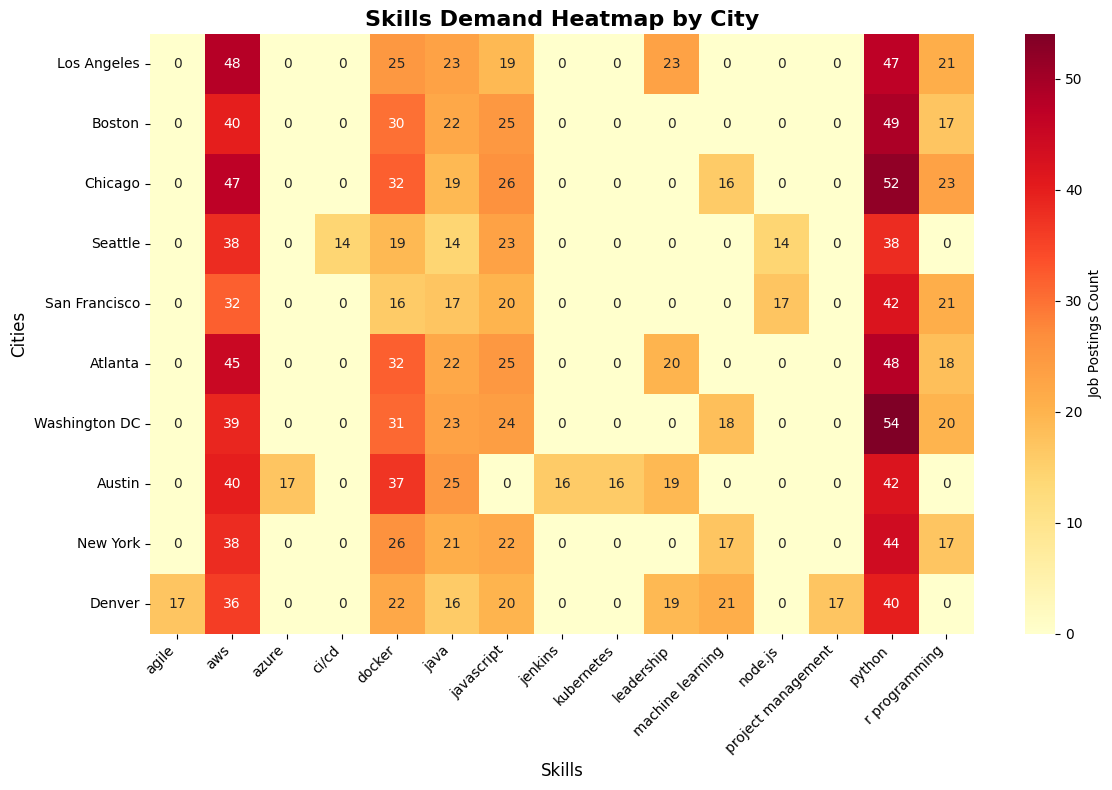

<Figure size 1400x1000 with 0 Axes>

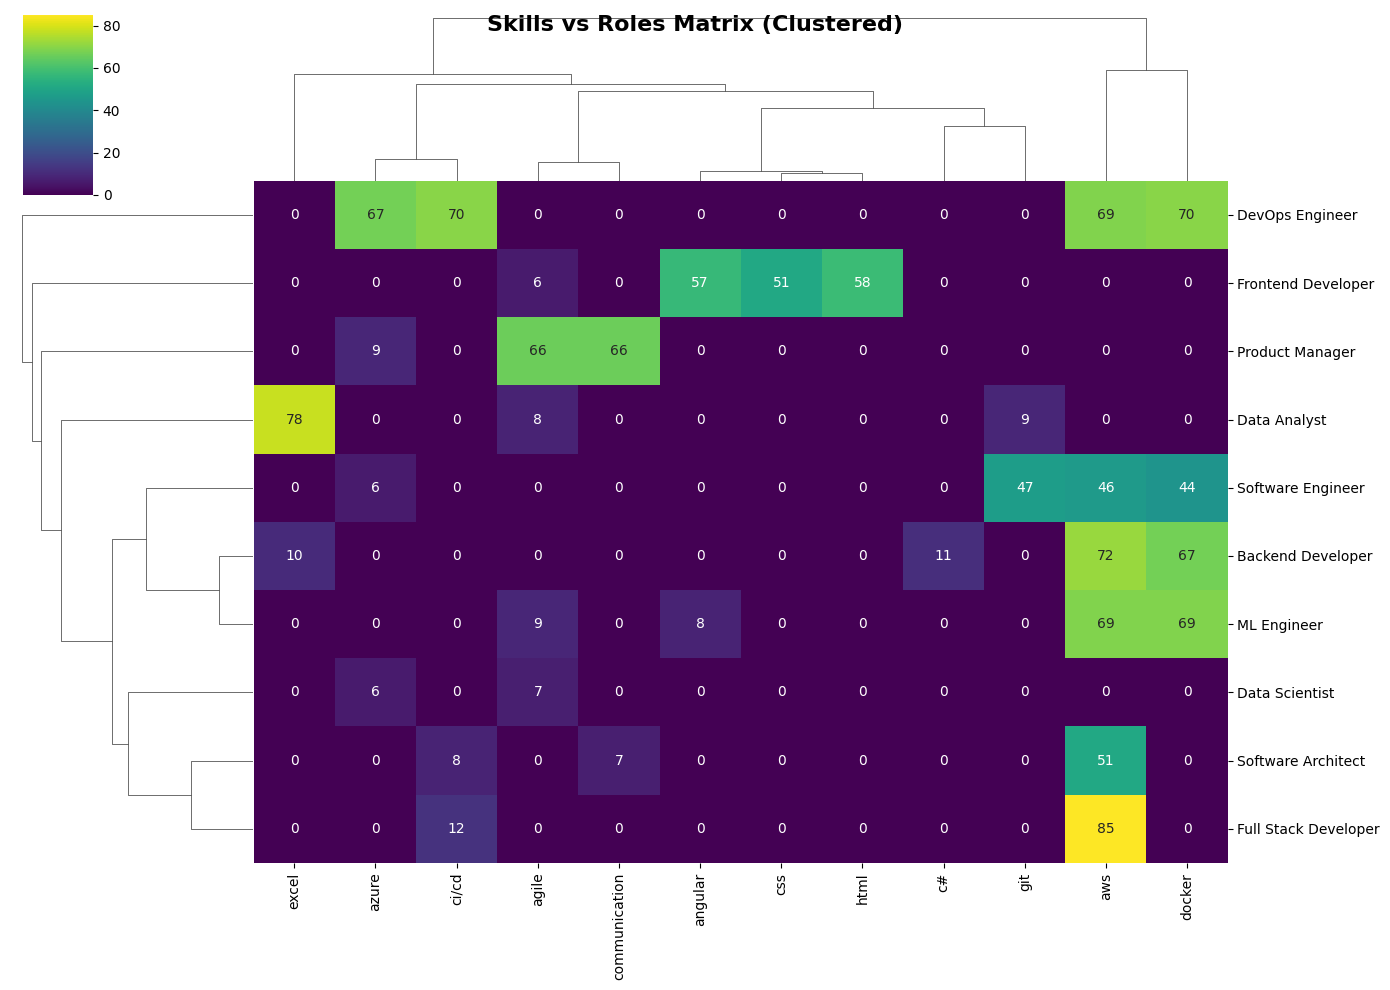

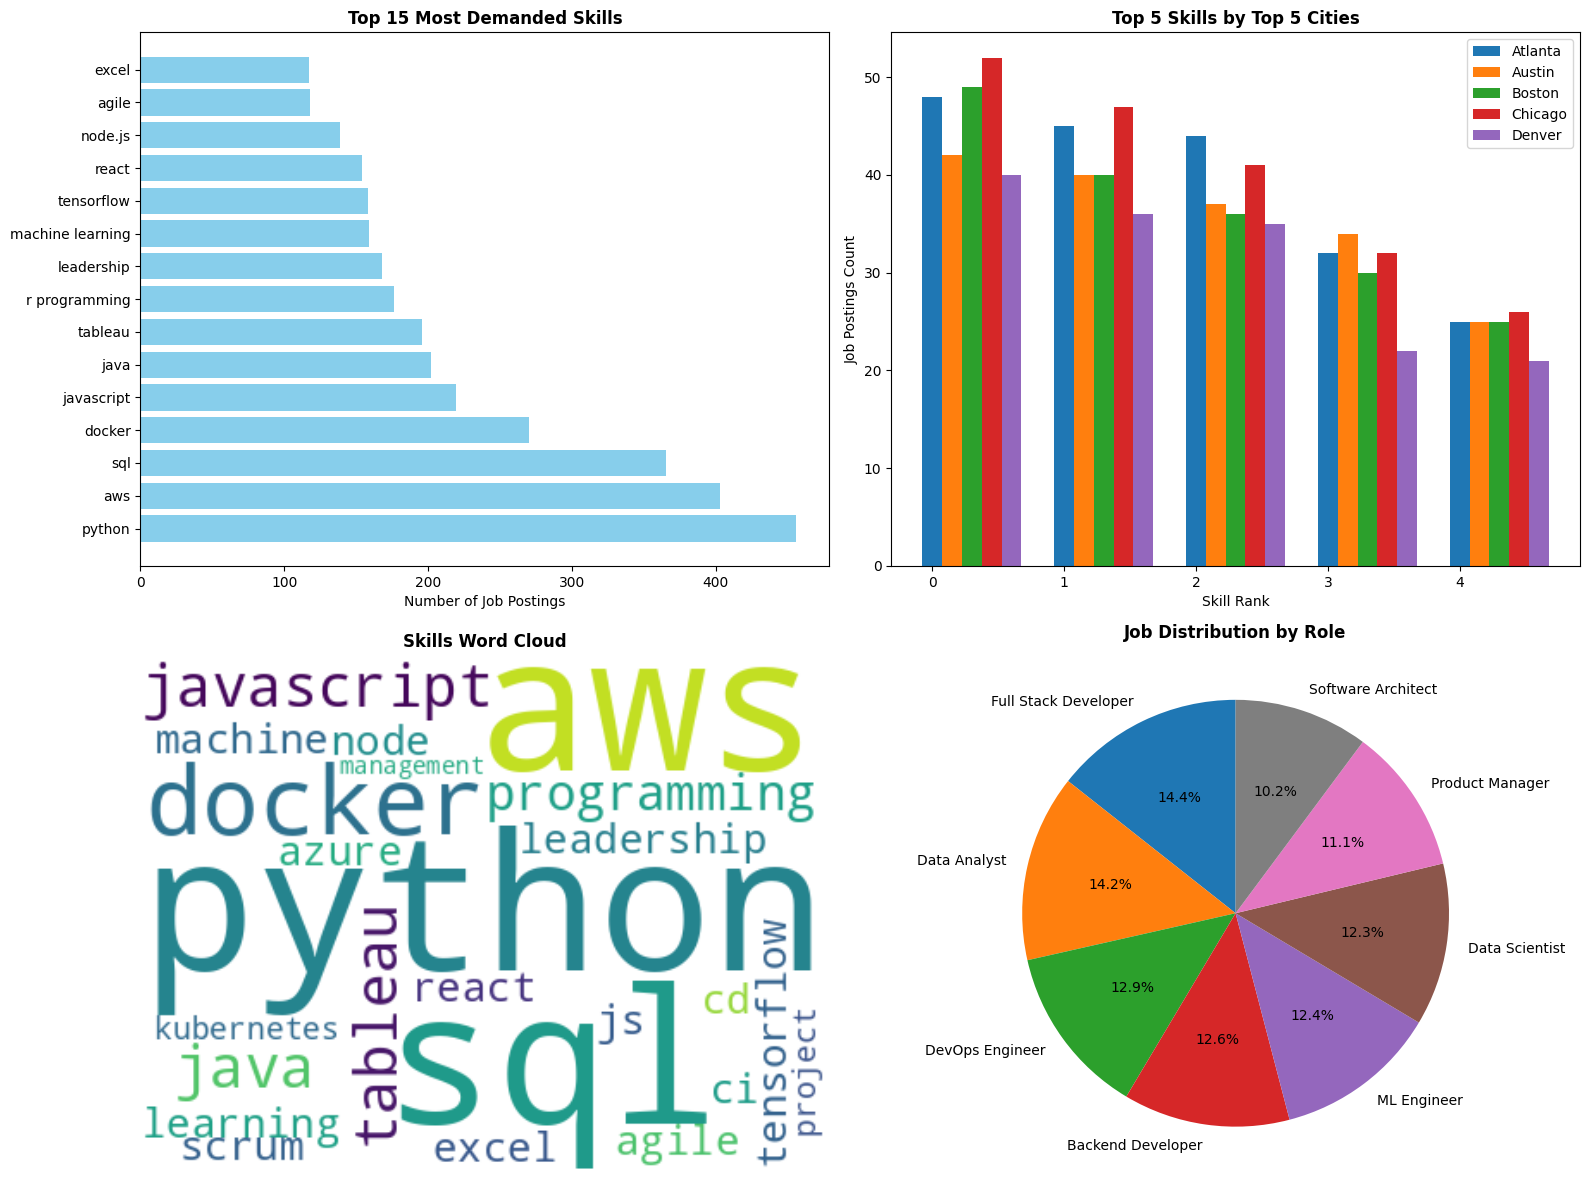


💡 Generating recommendations...

📁 Exporting results to Excel...
Analysis exported to job_trend_analysis.xlsx

📋 ANALYSIS SUMMARY

🎯 Top 5 Most Demanded Skills:
1. python: 456 mentions
2. aws: 403 mentions
3. sql: 365 mentions
4. docker: 270 mentions
5. javascript: 219 mentions

🏙️ Top Cities by Job Volume:
1. Los Angeles: 10 unique skills demanded
2. Boston: 10 unique skills demanded
3. Chicago: 10 unique skills demanded
4. Seattle: 10 unique skills demanded
5. San Francisco: 10 unique skills demanded

💼 Most Active Roles:
1. Software Architect: 356 total skill requirements
2. Software Engineer: 340 total skill requirements
3. Frontend Developer: 354 total skill requirements
4. Full Stack Developer: 503 total skill requirements
5. Backend Developer: 442 total skill requirements


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import re
from wordcloud import WordCloud
import requests
from bs4 import BeautifulSoup
import time
import random
from urllib.parse import urljoin, urlparse
import warnings
warnings.filterwarnings('ignore')

class JobTrendAnalyzer:
    def __init__(self):
        self.job_data = []
        self.skills_keywords = [
            'python', 'java', 'javascript', 'sql', 'aws', 'azure', 'docker',
            'kubernetes', 'react', 'angular', 'node.js', 'machine learning',
            'data science', 'artificial intelligence', 'tableau', 'power bi',
            'excel', 'r programming', 'tensorflow', 'pytorch', 'git', 'agile',
            'scrum', 'project management', 'communication', 'leadership',
            'problem solving', 'teamwork', 'c++', 'c#', '.net', 'spring boot',
            'django', 'flask', 'mongodb', 'postgresql', 'mysql', 'redis',
            'elasticsearch', 'spark', 'hadoop', 'kafka', 'jenkins', 'ci/cd'
        ]

    def generate_sample_data(self, n_jobs=1000):
        """Generate sample job data for demonstration purposes"""

        cities = ['San Francisco', 'New York', 'Seattle', 'Austin', 'Boston',
                 'Los Angeles', 'Chicago', 'Denver', 'Atlanta', 'Washington DC']

        roles = ['Software Engineer', 'Data Scientist', 'Product Manager',
                'DevOps Engineer', 'Frontend Developer', 'Backend Developer',
                'Full Stack Developer', 'ML Engineer', 'Data Analyst',
                'Software Architect']

        companies = ['Google', 'Microsoft', 'Amazon', 'Apple', 'Meta',
                    'Netflix', 'Uber', 'Airbnb', 'Spotify', 'Salesforce']

        sample_data = []

        for i in range(n_jobs):
            # Random selections
            city = random.choice(cities)
            role = random.choice(roles)
            company = random.choice(companies)

            # Generate skills based on role
            role_skills = self._get_role_specific_skills(role)
            num_skills = random.randint(3, 8)
            skills = random.sample(role_skills, min(num_skills, len(role_skills)))

            sample_data.append({
                'job_id': f'job_{i+1}',
                'title': role,
                'company': company,
                'location': city,
                'skills': ', '.join(skills),
                'salary_range': f"${random.randint(70, 200)}K - ${random.randint(120, 300)}K",
                'experience_level': random.choice(['Entry', 'Mid', 'Senior', 'Lead'])
            })

        self.job_data = pd.DataFrame(sample_data)
        return self.job_data

    def _get_role_specific_skills(self, role):
        """Return skills most relevant to specific roles"""
        skill_map = {
            'Software Engineer': ['python', 'java', 'javascript', 'git', 'sql', 'aws', 'docker'],
            'Data Scientist': ['python', 'r programming', 'sql', 'machine learning', 'tableau', 'tensorflow'],
            'Product Manager': ['agile', 'scrum', 'project management', 'communication', 'leadership'],
            'DevOps Engineer': ['aws', 'azure', 'docker', 'kubernetes', 'jenkins', 'ci/cd'],
            'Frontend Developer': ['javascript', 'react', 'angular', 'css', 'html', 'node.js'],
            'Backend Developer': ['python', 'java', 'sql', 'aws', 'docker', 'spring boot'],
            'Full Stack Developer': ['javascript', 'react', 'node.js', 'python', 'sql', 'aws'],
            'ML Engineer': ['python', 'tensorflow', 'pytorch', 'aws', 'docker', 'machine learning'],
            'Data Analyst': ['sql', 'excel', 'tableau', 'power bi', 'python', 'r programming'],
            'Software Architect': ['java', 'python', 'aws', 'microservices', 'system design', 'leadership']
        }

        base_skills = skill_map.get(role, self.skills_keywords[:10])
        # Add some random skills for variety
        additional_skills = random.sample(self.skills_keywords, 3)
        return list(set(base_skills + additional_skills))

    def alternative_data_scraper(self, source_url=None):
        """
        Alternative scraper for job sites that allow scraping
        (Indeed, AngelList, etc.)
        """
        # This is a template for scraping job-friendly sites
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
        }

        # Example structure for Indeed or other sites
        sample_indeed_scraper = """
        def scrape_indeed_jobs(query, location):
            base_url = "https://indeed.com/jobs"
            params = {'q': query, 'l': location}

            response = requests.get(base_url, params=params, headers=headers)
            soup = BeautifulSoup(response.content, 'html.parser')

            jobs = []
            job_cards = soup.find_all('div', class_='jobsearch-SerpJobCard')

            for card in job_cards:
                title = card.find('h2', class_='title')
                company = card.find('span', class_='company')
                location = card.find('div', class_='recJobLoc')

                if title and company:
                    jobs.append({
                        'title': title.get_text().strip(),
                        'company': company.get_text().strip(),
                        'location': location.get_text().strip() if location else '',
                    })

            return jobs
        """

        print("Alternative scraping methods:")
        print("1. Use job APIs (Indeed, Adzuna, Reed)")
        print("2. Scrape job-friendly sites")
        print("3. Use LinkedIn API (limited access)")
        print("\nFor this demo, using generated sample data...")

        return self.generate_sample_data()

    def clean_and_parse_skills(self, df):
        """Clean and standardize skill extraction"""

        def extract_skills(text):
            if pd.isna(text):
                return []

            text = text.lower()
            found_skills = []

            for skill in self.skills_keywords:
                if skill.lower() in text:
                    found_skills.append(skill.title())

            return found_skills

        # If skills aren't already extracted, extract from job descriptions
        if 'skills' not in df.columns and 'description' in df.columns:
            df['skills'] = df['description'].apply(extract_skills)
        elif 'skills' in df.columns:
            df['skills'] = df['skills'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)

        return df

    def analyze_skill_trends(self, df):
        """Analyze skill demand trends"""

        # Flatten skills data
        all_skills = []
        skill_by_city = defaultdict(list)
        skill_by_role = defaultdict(list)

        for _, row in df.iterrows():
            skills = row['skills'] if isinstance(row['skills'], list) else row['skills'].split(', ')
            city = row['location']
            role = row['title']

            for skill in skills:
                skill = skill.strip()
                all_skills.append(skill)
                skill_by_city[city].append(skill)
                skill_by_role[role].append(skill)

        # Overall skill frequency
        skill_counts = Counter(all_skills)

        # Top skills by city
        city_skill_analysis = {}
        for city, skills in skill_by_city.items():
            city_skill_analysis[city] = Counter(skills).most_common(10)

        # Top skills by role
        role_skill_analysis = {}
        for role, skills in skill_by_role.items():
            role_skill_analysis[role] = Counter(skills).most_common(10)

        return {
            'overall_skills': skill_counts.most_common(20),
            'skills_by_city': city_skill_analysis,
            'skills_by_role': role_skill_analysis
        }

    def create_skill_heatmap(self, analysis_results):
        """Generate heatmap of top 10 skills by city"""

        # Prepare data for heatmap
        cities = list(analysis_results['skills_by_city'].keys())
        all_top_skills = set()

        # Get top skills across all cities
        for city_skills in analysis_results['skills_by_city'].values():
            for skill, _ in city_skills[:10]:
                all_top_skills.add(skill)

        top_skills = sorted(list(all_top_skills))[:15]  # Limit for readability

        # Create matrix
        heatmap_data = []
        for city in cities:
            city_data = []
            city_skills_dict = dict(analysis_results['skills_by_city'][city])

            for skill in top_skills:
                city_data.append(city_skills_dict.get(skill, 0))

            heatmap_data.append(city_data)

        # Create heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(heatmap_data,
                   xticklabels=top_skills,
                   yticklabels=cities,
                   annot=True,
                   fmt='d',
                   cmap='YlOrRd',
                   cbar_kws={'label': 'Job Postings Count'})

        plt.title('Skills Demand Heatmap by City', fontsize=16, fontweight='bold')
        plt.xlabel('Skills', fontsize=12)
        plt.ylabel('Cities', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    def create_skill_role_matrix(self, analysis_results):
        """Create skill vs role matrix visualization"""

        roles = list(analysis_results['skills_by_role'].keys())
        all_skills = set()

        for role_skills in analysis_results['skills_by_role'].values():
            for skill, _ in role_skills[:8]:
                all_skills.add(skill)

        top_skills = sorted(list(all_skills))[:12]

        # Create matrix
        matrix_data = []
        for role in roles:
            role_data = []
            role_skills_dict = dict(analysis_results['skills_by_role'][role])

            for skill in top_skills:
                role_data.append(role_skills_dict.get(skill, 0))

            matrix_data.append(role_data)

        # Create clustered heatmap
        plt.figure(figsize=(14, 10))
        sns.clustermap(matrix_data,
                      xticklabels=top_skills,
                      yticklabels=roles,
                      annot=True,
                      fmt='d',
                      cmap='viridis',
                      figsize=(14, 10))

        plt.suptitle('Skills vs Roles Matrix (Clustered)', fontsize=16, fontweight='bold')
        plt.show()

    def generate_trend_visuals(self, analysis_results):
        """Generate comprehensive trend analysis visuals"""

        fig, axes = plt.subplots(2, 2, figsize=(16, 12))

        # 1. Overall top skills bar chart
        skills, counts = zip(*analysis_results['overall_skills'][:15])
        axes[0, 0].barh(range(len(skills)), counts, color='skyblue')
        axes[0, 0].set_yticks(range(len(skills)))
        axes[0, 0].set_yticklabels(skills)
        axes[0, 0].set_title('Top 15 Most Demanded Skills', fontweight='bold')
        axes[0, 0].set_xlabel('Number of Job Postings')

        # 2. Skills by city (top 5 cities)
        top_cities = sorted(analysis_results['skills_by_city'].keys())[:5]
        city_data = {}
        for city in top_cities:
            city_skills = analysis_results['skills_by_city'][city][:5]
            city_data[city] = [count for _, count in city_skills]

        x = np.arange(5)
        width = 0.15
        for i, (city, counts) in enumerate(city_data.items()):
            axes[0, 1].bar(x + i*width, counts, width, label=city)

        axes[0, 1].set_title('Top 5 Skills by Top 5 Cities', fontweight='bold')
        axes[0, 1].set_xlabel('Skill Rank')
        axes[0, 1].set_ylabel('Job Postings Count')
        axes[0, 1].legend()

        # 3. Word cloud of skills
        skill_text = ' '.join([skill for skill, _ in analysis_results['overall_skills']])
        if skill_text:
            wordcloud = WordCloud(width=400, height=300, background_color='white').generate(skill_text)
            axes[1, 0].imshow(wordcloud, interpolation='bilinear')
            axes[1, 0].axis('off')
            axes[1, 0].set_title('Skills Word Cloud', fontweight='bold')

        # 4. Role distribution
        role_counts = {}
        for role, skills in analysis_results['skills_by_role'].items():
            role_counts[role] = sum(count for _, count in skills)

        sorted_roles = sorted(role_counts.items(), key=lambda x: x[1], reverse=True)[:8]
        roles, counts = zip(*sorted_roles)

        axes[1, 1].pie(counts, labels=roles, autopct='%1.1f%%', startangle=90)
        axes[1, 1].set_title('Job Distribution by Role', fontweight='bold')

        plt.tight_layout()
        plt.show()

    def generate_recommendations(self, analysis_results, df):
        """Generate job demand recommendations"""

        recommendations = {
            'high_demand_skills': [],
            'emerging_cities': [],
            'role_insights': [],
            'market_trends': []
        }

        # High demand skills
        top_skills = analysis_results['overall_skills'][:10]
        recommendations['high_demand_skills'] = [
            f"{skill}: {count} job postings" for skill, count in top_skills
        ]

        # City analysis
        city_totals = {}
        for city, skills in analysis_results['skills_by_city'].items():
            city_totals[city] = sum(count for _, count in skills)

        sorted_cities = sorted(city_totals.items(), key=lambda x: x[1], reverse=True)
        recommendations['emerging_cities'] = [
            f"{city}: {total} total skill mentions" for city, total in sorted_cities[:5]
        ]

        # Role insights
        for role, skills in analysis_results['skills_by_role'].items():
            top_role_skills = [skill for skill, _ in skills[:3]]
            recommendations['role_insights'].append(
                f"{role}: Key skills - {', '.join(top_role_skills)}"
            )

        # Market trends
        recommendations['market_trends'] = [
            "Python remains the most in-demand programming language",
            "Cloud skills (AWS, Azure) show strong demand across cities",
            "Data science and ML skills are consistently high-value",
            "Agile/Scrum methodologies are essential for most roles"
        ]

        return recommendations

    def export_to_excel(self, df, analysis_results, recommendations, filename='job_trend_analysis.xlsx'):
        """Export analysis results to Excel"""

        with pd.ExcelWriter(filename, engine='openpyxl') as writer:
            # Raw data
            df.to_excel(writer, sheet_name='Raw_Data', index=False)

            # Overall skills analysis
            skills_df = pd.DataFrame(analysis_results['overall_skills'],
                                   columns=['Skill', 'Count'])
            skills_df.to_excel(writer, sheet_name='Top_Skills', index=False)

            # Skills by city
            city_skills_data = []
            for city, skills in analysis_results['skills_by_city'].items():
                for skill, count in skills:
                    city_skills_data.append({'City': city, 'Skill': skill, 'Count': count})

            city_skills_df = pd.DataFrame(city_skills_data)
            city_skills_df.to_excel(writer, sheet_name='Skills_by_City', index=False)

            # Recommendations
            rec_data = []
            for category, items in recommendations.items():
                for item in items:
                    rec_data.append({'Category': category.replace('_', ' ').title(),
                                   'Recommendation': item})

            rec_df = pd.DataFrame(rec_data)
            rec_df.to_excel(writer, sheet_name='Recommendations', index=False)

        print(f"Analysis exported to {filename}")

# Usage Example and Demo
def run_job_trend_analysis():
    """Complete job trend analysis workflow"""

    print("🔍 LinkedIn Job Trend Analysis System")
    print("=" * 50)

    # Initialize analyzer
    analyzer = JobTrendAnalyzer()

    # Generate/Load data (using sample data for demo)
    print("\n📊 Generating sample job data...")
    df = analyzer.generate_sample_data(1000)
    print(f"✅ Generated {len(df)} job postings")

    # Clean and parse skills
    print("\n🧹 Cleaning and parsing skills...")
    df = analyzer.clean_and_parse_skills(df)

    # Analyze trends
    print("\n📈 Analyzing skill trends...")
    analysis_results = analyzer.analyze_skill_trends(df)

    # Generate visualizations
    print("\n📊 Creating visualizations...")
    analyzer.create_skill_heatmap(analysis_results)
    analyzer.create_skill_role_matrix(analysis_results)
    analyzer.generate_trend_visuals(analysis_results)

    # Generate recommendations
    print("\n💡 Generating recommendations...")
    recommendations = analyzer.generate_recommendations(analysis_results, df)

    # Export results
    print("\n📁 Exporting results to Excel...")
    analyzer.export_to_excel(df, analysis_results, recommendations)

    # Print summary
    print("\n" + "=" * 50)
    print("📋 ANALYSIS SUMMARY")
    print("=" * 50)

    print(f"\n🎯 Top 5 Most Demanded Skills:")
    for i, (skill, count) in enumerate(analysis_results['overall_skills'][:5], 1):
        print(f"{i}. {skill}: {count} mentions")

    print(f"\n🏙️ Top Cities by Job Volume:")
    city_totals = {}
    for city, skills in analysis_results['skills_by_city'].items():
        city_totals[city] = len(skills)

    for i, (city, count) in enumerate(sorted(city_totals.items(),
                                           key=lambda x: x[1], reverse=True)[:5], 1):
        print(f"{i}. {city}: {count} unique skills demanded")

    print(f"\n💼 Most Active Roles:")
    for i, role in enumerate(list(analysis_results['skills_by_role'].keys())[:5], 1):
        role_total = sum(count for _, count in analysis_results['skills_by_role'][role])
        print(f"{i}. {role}: {role_total} total skill requirements")

    return analyzer, df, analysis_results, recommendations

if __name__ == "__main__":
    # Run the complete analysis
    analyzer, data, results, recs = run_job_trend_analysis()
